# TP1 - Análisis con enfoque a la columna 'keyword'

> #### importación general de librerías y de visualización (matplotlib y seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [2]:
sns.set (style = 'darkgrid')

> #### Leemos el dataFrame

In [3]:
df = pd.read_csv('../train.csv')
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


> #### Vemos la cantidad de registros y caracteristicas generales de las columnas numericas

In [4]:
df.shape

(7613, 5)

In [5]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


> #### Nos enfocamos en la columna 'keyword'
* Vemos la cantidad de nulos de esta columna
* Los primeros 30 valores
* La cantidad de valores distintos que obtiene esta columna

In [6]:
sNulos = df.keyword.isna().value_counts()
sNulos

False    7552
True       61
Name: keyword, dtype: int64

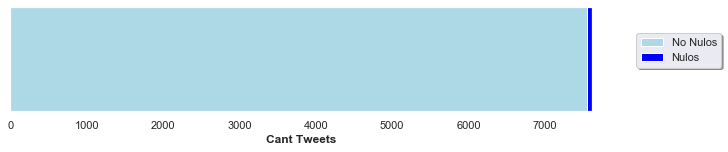

In [7]:
lenNotNan = sNulos.values[0]
lenNan = sNulos.values[1]

fsize = (10,2)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
ax.barh([''], [lenNotNan], color='lightblue', edgecolor='white', height =barWidth, label='No Nulos')
ax.barh([''], [lenNan], left=[lenNotNan], color='blue', edgecolor='white', height =barWidth, label='Nulos')
#ax.set_title("Keywords Comunes vs distintas", fontsize=30)
ax.set_xlabel('Cant Tweets',fontweight='bold')
ax.set_ylabel('',fontweight='bold')

chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)

In [8]:
df.keyword.unique()[:30]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging'],
      dtype=object)

In [9]:
df.keyword.unique().size

222

> #### Procedemos a crearnos un dataFrame aparte con este universo
> * <i>Nos sacamos de encima los nulos, el cual vimos anteriormente que eran sólo 61 items</i>
> * <i>Corregimos algunos datos, observando previamente la presencia del caracter '%20' el cual representa un espacio</i>

In [10]:
dfK = df.dropna(subset=['keyword']).copy()
dfK.shape

(7552, 5)

In [11]:
dfK['keyword'] = dfK['keyword'].apply(lambda x: x.replace('%20', '_'))
dfK.keyword.unique()[:30]

array(['ablaze', 'accident', 'aftershock', 'airplane_accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew_up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown_up', 'body_bag', 'body_bagging', 'body_bags'],
      dtype=object)

> #### Creamos un gráfico para ver el top 30 de 'keyword'

Text(0, 0.5, 'Keyword')

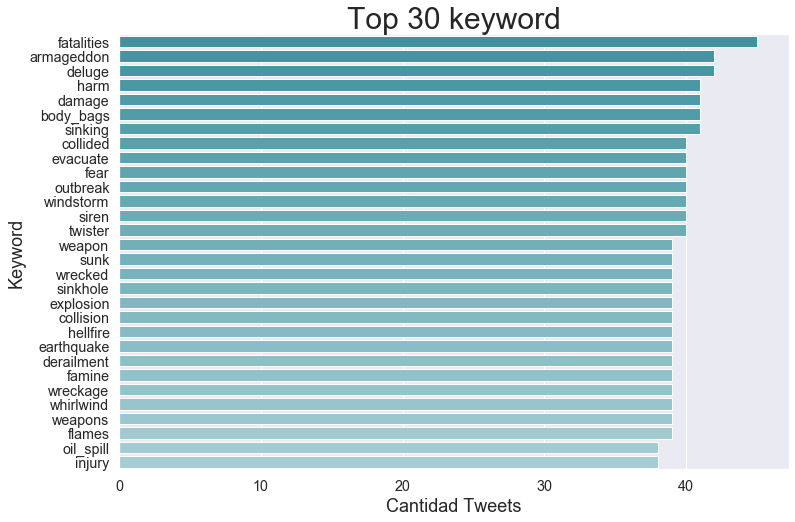

In [12]:
#s = dfK.keyword.value_counts()
s = dfK.keyword.value_counts().head(30)
p = pd.DataFrame({'keyword': s.index, 'cant': s.values })

plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.3)
g = sns.barplot(x='cant', y='keyword', data=p, orient="h", palette=sns.light_palette((210, 90, 60), 50, input="husl", reverse=True))
g.set_title("Top 30 keyword", fontsize=30)
g.set_xlabel("Cantidad Tweets", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)
#show_values_on_bars(g, "h")

> #### Creamos un grafico para ver las keyword mas frecuentes en el universo de Tweet verdaderos

<Figure size 432x288 with 0 Axes>

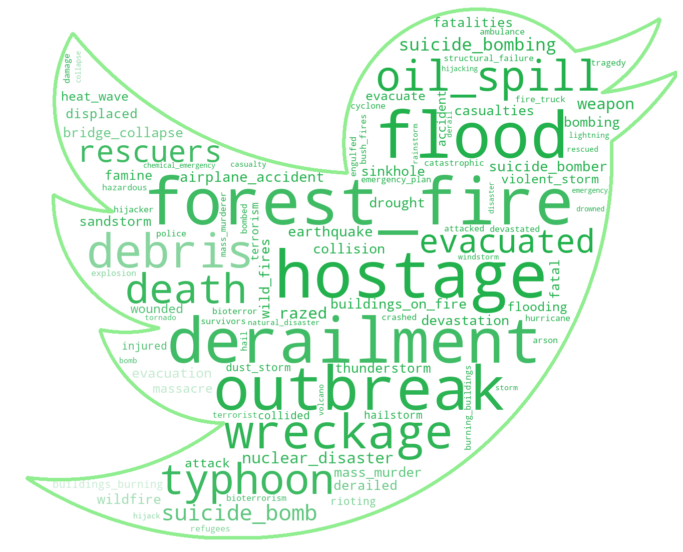

In [13]:
text1 = dfK.where(dfK.target == 1).dropna(how='all').keyword.str.cat(sep=' ')

# Create the wordcloud object
mascara = np.array(Image.open('../twitterGreen.png'))
wordcloud = WordCloud(
    background_color='#FFFFFF',
   ##font_path = '/usr/share/fonts/truetype/tlwg/Laksaman.ttf',
    mask=mascara,
    ##stopwords=stopw,
    max_words=100,
    min_font_size=5,
    max_font_size=130, 
    random_state=42,
    width=1920, 
    height=1080,
    contour_width=10,
    contour_color='lightgreen',
    collocations=False
).generate(text1)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

> #### Creamos un grafico para ver las keyword mas frecuentes en el universo de Tweet falsos

<Figure size 432x288 with 0 Axes>

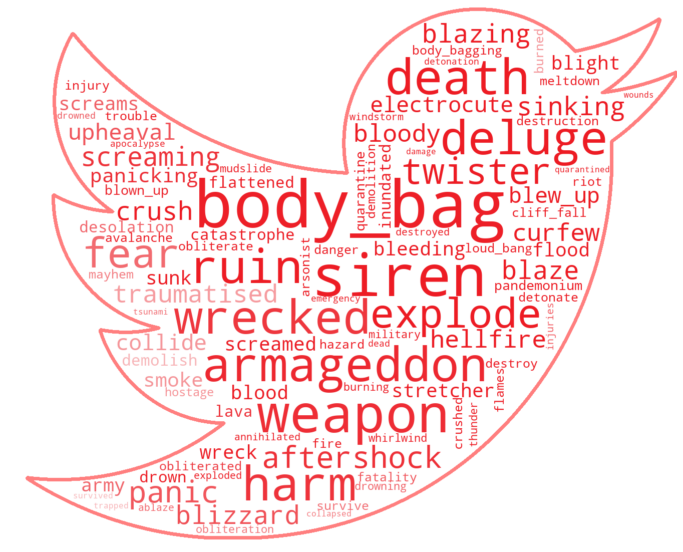

In [14]:
text2 = dfK.where(dfK.target == 0).dropna(how='all').keyword.str.cat(sep=' ')

# Create the wordcloud object
mascara = np.array(Image.open('../twitterRed.png'))
wordcloud = WordCloud(
    background_color='#FFFFFF',
   ##font_path = '/usr/share/fonts/truetype/tlwg/Laksaman.ttf',
    mask=mascara,
    ##stopwords=stopw,
    max_words=100,
    min_font_size=5,
    max_font_size=130, 
    random_state=42,
    width=1920, 
    height=1080,
    contour_width=10,
    contour_color='#FF7F7F',
    collocations=False
).generate(text2)

image_colors = ImageColorGenerator(mascara)
fig = plt.figure(1)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

> #### Investigamos las keyword <b>Comunes</b> entre los tweets verdaderos y falsos

In [15]:
arrTrue = dfK.where(dfK.target == 1).dropna(how='all').keyword.value_counts()
dfTrue = pd.DataFrame({'keyword': arrTrue.index, 'cant_verdaderos': arrTrue.values})

arrFalse = dfK.where(dfK.target == 0).dropna(how='all').keyword.value_counts()
dfFalse = pd.DataFrame({'keyword': arrFalse.index, 'cant_falsos': arrFalse.values})

dfJoin = pd.merge(dfTrue, dfFalse, how='inner', on='keyword')
dfJoin.head(10)

,keyword,cant_verdaderos,cant_falsos
0,outbreak,39,1
1,oil_spill,37,1
2,typhoon,37,1
3,suicide_bomb,32,3
4,evacuated,32,4
5,rescuers,32,3
6,suicide_bombing,32,1
7,nuclear_disaster,31,3
8,razed,31,4
9,airplane_accident,30,5


> #### Vemos la cantidad de keyword comunes:

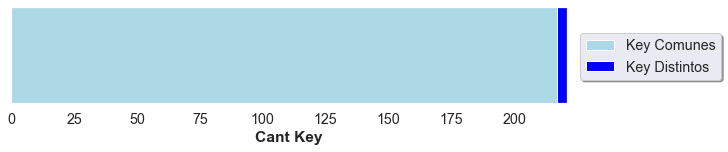

In [16]:
lenKComunes = dfJoin.shape[0]
lenKTotales = dfK.keyword.unique().size - lenKComunes

fsize = (10,2)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
ax.barh([''], [lenKComunes], color='lightblue', edgecolor='white', height =barWidth, label='Key Comunes')
ax.barh([''], [lenKTotales], left=[lenKComunes], color='blue', edgecolor='white', height =barWidth, label='Key Distintos')
#ax.set_title("Keywords Comunes vs distintas", fontsize=30)
ax.set_xlabel('Cant Key',fontweight='bold')
ax.set_ylabel('',fontweight='bold')

chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)

> #### Analizamos el top de keyword comunes

In [17]:
dfJoin['cant_total'] = dfJoin.cant_verdaderos + dfJoin.cant_falsos

Text(0, 0.5, 'Keyword')

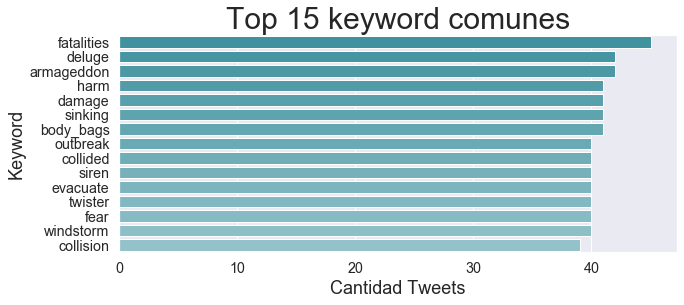

In [18]:
#s = dfK.keyword.value_counts()
p = dfJoin.sort_values(by=['cant_total'], ascending=False).head(15)
#p = pd.DataFrame({'keyword': s.index, 'cant': s.values })

plt.figure(figsize=(10, 4))
sns.set(font_scale = 1.3)
g = sns.barplot(x='cant_total', y='keyword', data=p, orient="h", palette=sns.light_palette((210, 90, 60), 30, input="husl", reverse=True))
g.set_title("Top 15 keyword comunes", fontsize=30)
g.set_xlabel("Cantidad Tweets", fontsize=18)
g.set_ylabel("Keyword", fontsize=18)
#show_values_on_bars(g, "h")

> #### Analizamos el top de keyword de los tweets verdaderos y contrastamos contra los tweets falsos

Text(0.5, 1.0, 'Top 30 keyword verdaderas vs falsas')

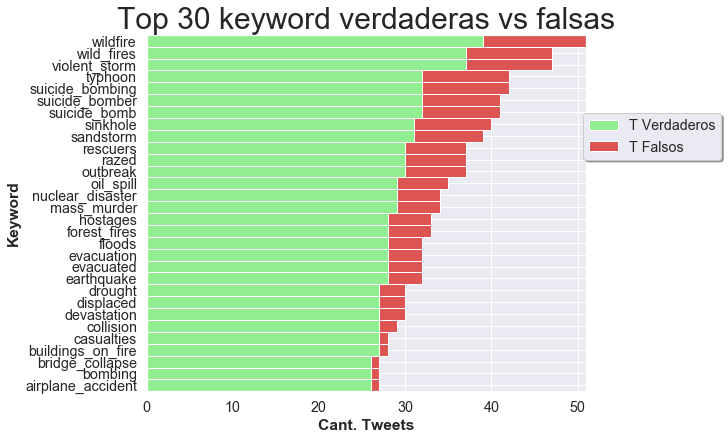

In [24]:
keywords = dfJoin.sort_values(by=['cant_verdaderos'], ascending=False ).keyword.values[:30]
cant_verdaderos = dfJoin.sort_values(by=['cant_verdaderos'], ascending=False).cant_verdaderos.values[:30]
cant_falsos = dfJoin.sort_values(by=['cant_verdaderos'], ascending=False).cant_falsos.values[:30]

keywords.sort()
cant_verdaderos.sort()
cant_falsos.sort()

fsize = (10,6)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
# Create brown bars
ax.barh(keywords, cant_verdaderos, color='lightgreen', edgecolor='white', height =barWidth, label='T Verdaderos')
# Create green bars (middle), on top of the firs ones
ax.barh(keywords, cant_falsos, left=cant_verdaderos, color='#DC5552', edgecolor='white', height =barWidth, label='T Falsos')
# Create green bars (top)
 
ax.set_xlabel('Cant. Tweets',fontweight='bold')
ax.set_ylabel('Keyword',fontweight='bold')

#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
chartBox = ax.get_position()
#ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
ax.set_title("Top 30 keyword verdaderas vs falsas", fontsize=30)
#ax.use_sticky_edges = True
# Custom X axis
#plt.xticks(names, fontweight='bold')
#fig.xlabel("group")
 
# Show graphic
#plt.show()


> #### Analizamos el top de keyword de los tweets falsos y contrastamos contra los tweets verdaderos

Text(0.5, 1.0, 'Top 30 keyword falsas vs verdaderas')

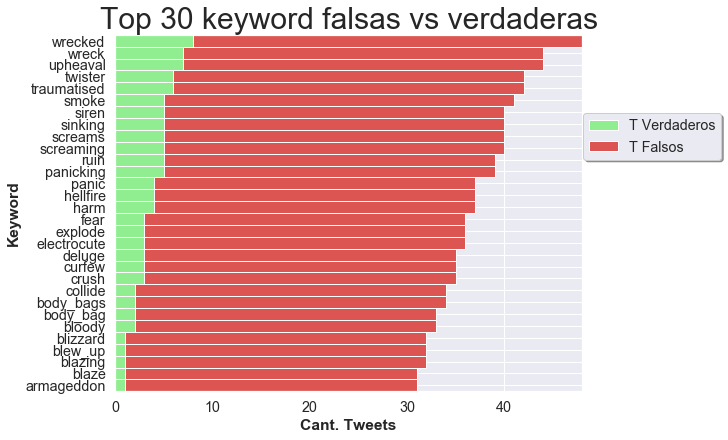

In [25]:
keywords = dfJoin.sort_values(by=['cant_falsos'], ascending=False ).keyword.values[:30]
cant_verdaderos = dfJoin.sort_values(by=['cant_falsos'], ascending=False).cant_verdaderos.values[:30]
cant_falsos = dfJoin.sort_values(by=['cant_falsos'], ascending=False).cant_falsos.values[:30]

keywords.sort()
cant_verdaderos.sort()
cant_falsos.sort()

fsize = (10,6)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
# Create brown bars
ax.barh(keywords, cant_verdaderos, color='lightgreen', edgecolor='white', height =barWidth, label='T Verdaderos')
# Create green bars (middle), on top of the firs ones
ax.barh(keywords, cant_falsos, left=cant_verdaderos, color='#DC5552', edgecolor='white', height =barWidth, label='T Falsos')
# Create green bars (top)
 
ax.set_xlabel('Cant. Tweets',fontweight='bold')
ax.set_ylabel('Keyword',fontweight='bold')

#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')
chartBox = ax.get_position()
#ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.8, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)
ax.set_title("Top 30 keyword falsas vs verdaderas", fontsize=30)
#ax.use_sticky_edges = True
# Custom X axis
#plt.xticks(names, fontweight='bold')
#fig.xlabel("group")
 
# Show graphic
#plt.show()


> #### Analizamos la keyword con el texto de los tweets

In [113]:
#creamos una funcion auxiliar y la probamos
key = 'hola_a_todos'
text = 'Les doy la bienvenida a todos diciendo hola'
def is_in_text(keyword, text):
    is_in = True
    arrKeyword = keyword.split("_")
    for key in arrKeyword:
        if not(key.upper() in text.upper()):
            is_in = False
            break
    
    return is_in

is_in_text(key,text)

True

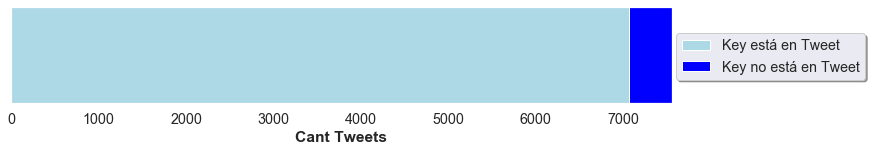

In [114]:
def is_in_text(keyword, text):
    is_in = True
    arrKeyword = keyword.split("_")
    for key in arrKeyword:
        if not(key.upper() in text.upper()):
            is_in = False
            break
    
    return is_in

dfK['keyword_in_text'] = dfK.apply(lambda x: is_in_text(x.keyword, x.text), axis=1)

b = dfK.keyword_in_text.value_counts()
lenInText = b.values[0]
lenNotInText = b.values[1]
lenInText, lenNotInText

fsize = (12,2)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
ax.barh([''], [lenInText], color='lightblue', edgecolor='white', height =barWidth, label='Key está en Tweet')
ax.barh([''], [lenNotInText], left=[lenInText], color='blue', edgecolor='white', height =barWidth, label='Key no está en Tweet')
#ax.set_title("Keywords Comunes vs distintas", fontsize=30)
ax.set_xlabel('Cant Tweets',fontweight='bold')
ax.set_ylabel('',fontweight='bold')

chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)

In [115]:
dfK.where(dfK.keyword == 'buildings_on_fire').dropna(how='all').iloc[13]

id                                                              1791
keyword                                            buildings_on_fire
location                                             Nigeria, Global
text               just in: #kenya: several buildings are reporte...
target                                                             1
keyword_in_text                                                    1
Name: 1243, dtype: object

> #### Analizamos los tweets que no tienen su keyword en el texto

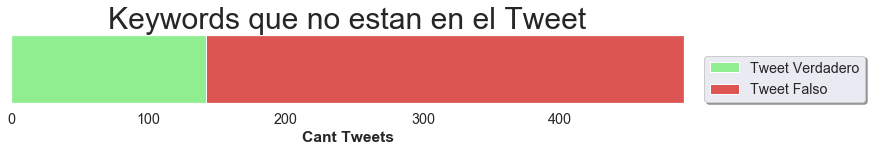

In [130]:
r = dfK.where(dfK.keyword_in_text == False).dropna(how='all').target.value_counts()
lenTFalsos = r.values[0]
lenVerdaderos = r.values[1]
lenTFalsos, lenVerdaderos

fsize = (12,2)
fig, ax = plt.subplots(figsize=fsize, constrained_layout=True)
plt.margins(0)
barWidth = 1
 
ax.barh([''], [lenVerdaderos], color='lightgreen', edgecolor='white', height =barWidth, label='Tweet Verdadero')
ax.barh([''], [lenTFalsos], left=[lenVerdaderos], color='#DC5552', edgecolor='white', height =barWidth, label='Tweet Falso')
#ax.set_title("Keywords Comunes vs distintas", fontsize=30)
ax.set_xlabel('Cant Tweets',fontweight='bold')
ax.set_ylabel('',fontweight='bold')
ax.set_title("Keywords que no estan en el Tweet", fontsize=30)

chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)